In [1]:
!git clone https://github.com/swghosh/DeepFace.git
!cd DeepFace && python3 setup.py install
# RESTART RUNTIME AFTER THIS CELL IS RUNT

Cloning into 'DeepFace'...
remote: Enumerating objects: 212, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 212 (delta 32), reused 62 (delta 17), pack-reused 129
Receiving objects: 100% (212/212), 478.88 KiB | 7.72 MiB/s, done.
Resolving deltas: 100% (82/82), done.
running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.10/dist-packages/setuptools/_distu

In [1]:
from google.colab import drive
drive.mount('./drive')

Drive already mounted at ./drive; to attempt to forcibly remount, call drive.mount("./drive", force_remount=True).


In [2]:
from deepface import deepface
from tensorflow import keras

In [17]:
import os
import numpy as np
import tensorflow as tf
import cv2
import torch.nn.functional as F
from google.colab.patches import cv2_imshow

In [28]:
base_model = deepface.create_deepface()
weights_path = deepface.get_weights()
base_model.load_weights(weights_path)

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Model: "DeepFace"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 C1 (Conv2D)                 (None, 142, 142, 32)      11648     
                                                                 
 M2 (MaxPooling2D)           (None, 71, 71, 32)        0         
                                                                 
 C3 (Conv2D)                 (None, 63, 63, 16)        41488     
                                                                 
 L4 (LocallyConnected2D)     (None, 55, 55, 16)        62774800  
                                                                 
 L5 (LocallyConnected2D)     (None, 25, 25, 16)        7850000   
                                                                 
 L6 (LocallyConnected2D)     (None, 21, 21, 16)        2829456   
                                                                 
 F0 (Flatten)                (None, 7056)              0  

In [29]:
reqd_layer = 'F8'
feature_model = keras.models.Model(inputs=base_model.input,
   outputs=base_model.get_layer(reqd_layer).output, name='DeepFaceFeatures')
feature_model.trainable = False
feature_model.summary()

Model: "DeepFaceFeatures"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 I0 (InputLayer)             [(None, 152, 152, 3)]     0         
                                                                 
 C1 (Conv2D)                 (None, 142, 142, 32)      11648     
                                                                 
 M2 (MaxPooling2D)           (None, 71, 71, 32)        0         
                                                                 
 C3 (Conv2D)                 (None, 63, 63, 16)        41488     
                                                                 
 L4 (LocallyConnected2D)     (None, 55, 55, 16)        62774800  
                                                                 
 L5 (LocallyConnected2D)     (None, 25, 25, 16)        7850000   
                                                                 
 L6 (LocallyConnected2D)     (None, 21, 21, 16)   

# Dataset Preparation

In [5]:
!unzip "/content/drive/MyDrive/Classification/classfication final data 1st nov.zip"

Streaming output truncated to the last 5000 lines.
  inflating: classfication final data/Non Yellow/1657102291785.png_3499_1797_150_133_259.png  
  inflating: classfication final data/Non Yellow/1657102291785.png_351_2092_126_138_253.png  
  inflating: classfication final data/Non Yellow/1657102291785.png_3513_612_184_146_133.png  
  inflating: classfication final data/Non Yellow/1657102291785.png_3522_1232_193_159_127.png  
  inflating: classfication final data/Non Yellow/1657102291785.png_3524_746_133_127_132.png  
  inflating: classfication final data/Non Yellow/1657102291785.png_3535_1596_148_212_185.png  
  inflating: classfication final data/Non Yellow/1657102291785.png_3556_1497_160_140_272.png  
  inflating: classfication final data/Non Yellow/1657102291785.png_3594_2228_120_123_46.png  
  inflating: classfication final data/Non Yellow/1657102291785.png_3605_2417_144_142_202.png  
  inflating: classfication final data/Non Yellow/1657102291785.png_3612_104_145_122_68.png  
  inf

In [23]:
path = "/content/classfication final data/No Defect/"
images = os.listdir(path)

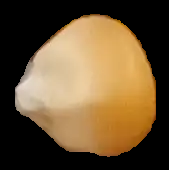

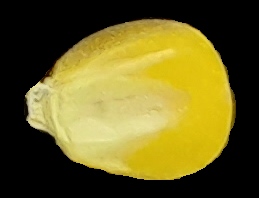

1.414193


In [31]:
img1 = cv2.imread(path+images[0])
cv2_imshow(img1)
img1 = img1.astype('float32')
img1 = cv2.resize(img1, dsize=(152, 152), interpolation=cv2.INTER_AREA)
img1 = img1.reshape(1, 152, 152, 3)

img2 = cv2.imread(path+images[2])
cv2_imshow(img2)
img2 = img2.astype('float32')
img2 = cv2.resize(img2, dsize=(152, 152), interpolation=cv2.INTER_AREA)
img2 = img2.reshape(1, 152, 152, 3)

emb1, emb2 = base_model(img1), base_model(img2)
distance = dist = np.linalg.norm(emb1-emb2)
print(distance)

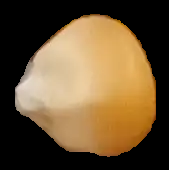

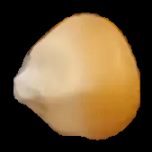

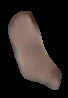

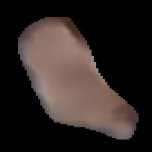

1.4142135


In [33]:
anomaly_path = "/content/classfication final data/Foreign/"
anomaly = os.listdir(anomaly_path)

img1 = cv2.imread(path+images[0])
cv2_imshow(img1)
img1 = img1.astype('float32')
img1 = cv2.resize(img1, dsize=(152, 152), interpolation=cv2.INTER_AREA)
cv2_imshow(img1)
img1 = img1.reshape(1, 152, 152, 3)

img2 = cv2.imread(anomaly_path+anomaly[0])
cv2_imshow(img2)
img2 = img2.astype('float32')
img2 = cv2.resize(img2, dsize=(152, 152), interpolation=cv2.INTER_AREA)
cv2_imshow(img2)
img2 = img2.reshape(1, 152, 152, 3)

emb1, emb2 = base_model(img1), base_model(img2)
distance = dist = np.linalg.norm(emb1-emb2)
print(distance)